In [1]:
import pandas as pd

file_path = "/kaggle/input/website_ab_test.csv"
df = pd.read_csv(file_path)

df.head()



,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


## Scroll Depth (sayfa kaydırma derinliği)

In [2]:
# Scroll Depth'i aralıklara bölelim
bins = [0, 25, 50, 75, 100]
labels = ["0-25%", "26-50%", "51-75%", "76-100%"]
df["Scroll_Group"] = pd.cut(df["Scroll_Depth"], bins=bins, labels=labels, right=True)

# Her aralık için ortalama dönüşüm oranı
scroll_conversion = (
    df.groupby("Scroll_Group", observed=True)["Conversion Rate"]
    .mean()
    .reset_index()
)
scroll_conversion.sort_values(by="Conversion Rate", ascending=False)


,Scroll_Group,Conversion Rate
0,0-25%,0.272575
3,76-100%,0.265189
2,51-75%,0.252459
1,26-50%,0.248664


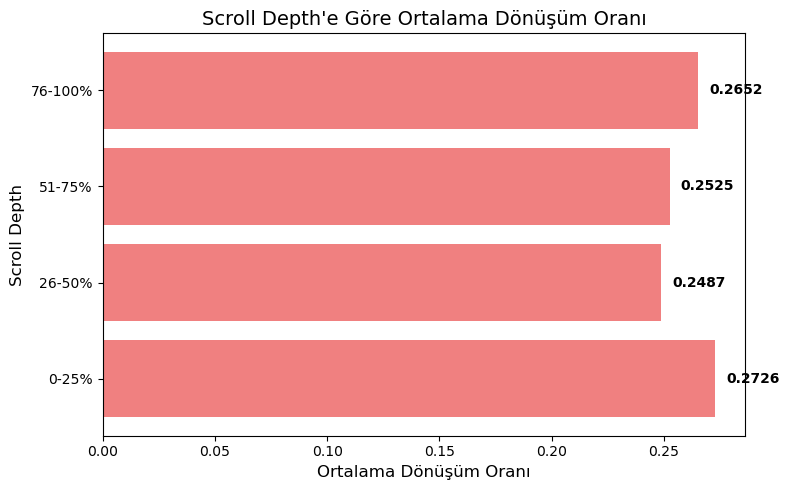

In [3]:
import matplotlib.pyplot as plt

scroll_groups = ["0-25%", "26-50%", "51-75%", "76-100%"]
conversion_rates = [0.272575, 0.248664, 0.252459, 0.265189]

plt.figure(figsize=(8, 5))
plt.barh(scroll_groups, conversion_rates, color='lightcoral')

plt.title("Scroll Depth'e Göre Ortalama Dönüşüm Oranı", fontsize=14)
plt.xlabel("Ortalama Dönüşüm Oranı", fontsize=12)
plt.ylabel("Scroll Depth", fontsize=12)

for index, value in enumerate(conversion_rates):
    plt.text(value + 0.005, index, f"{value:.4f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


### sayfanın üst kısmında (ilk %25) kaydıran kullanıcıların, sayfanın alt kısmına kadar kaydıranlara göre daha fazla dönüşüm gerçekleştirdiğini gösteriyor.

## Scroll Depth (sayfa kaydırma derinliği) ile Session Duration (oturum süresi) arasındaki ilişki

In [4]:
# Scroll Depth'e göre ortalama oturum süresi
scroll_session_duration = df.groupby("Scroll_Group", observed=True)["Session_Duration"].mean().reset_index()
scroll_session_duration.sort_values(by="Session_Duration", ascending=False)


,Scroll_Group,Session_Duration
2,51-75%,939.046189
1,26-50%,932.103365
3,76-100%,881.341463
0,0-25%,845.898551


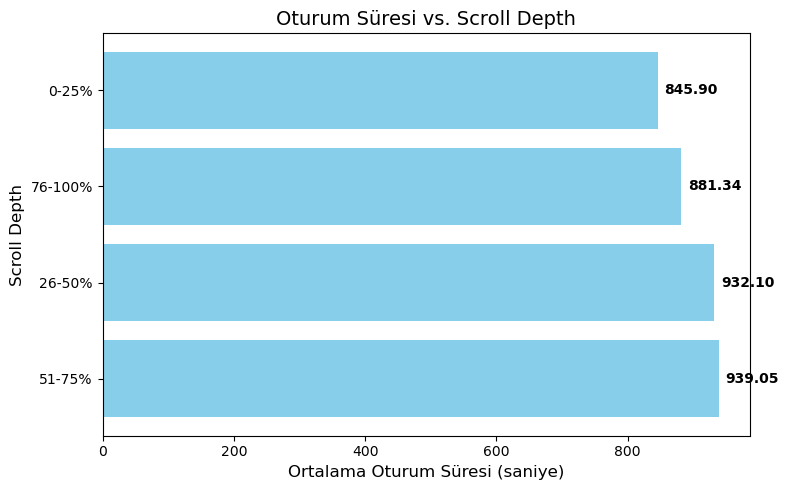

In [5]:
import matplotlib.pyplot as plt

scroll_groups = ["51-75%", "26-50%", "76-100%", "0-25%"]
session_durations = [939.046189, 932.103365, 881.341463, 845.898551]

plt.figure(figsize=(8, 5))
plt.barh(scroll_groups, session_durations, color='skyblue')

plt.title("Oturum Süresi vs. Scroll Depth", fontsize=14)
plt.xlabel("Ortalama Oturum Süresi (saniye)", fontsize=12)
plt.ylabel("Scroll Depth", fontsize=12)

for index, value in enumerate(session_durations):
    plt.text(value + 10, index, f"{value:.2f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()


#### 51-75% kaydırma derinliği ile oturum süresi en yüksek (yaklaşık 939 saniye), yani bu aralıkta kullanıcılar sayfayı en uzun süreyle görüntülemişler.
#### 26-50% kaydırma derinliği ile oturum süresi biraz daha düşük (yaklaşık 932 saniye), ancak yine de yüksek.
#### 76-100% kaydırma derinliği ile oturum süresi (yaklaşık 881 saniye) daha düşük, ancak hala anlamlı bir süre.
#### 0-25% kaydırma derinliği ile oturum süresi en düşük (yaklaşık 846 saniye), yani bu kullanıcılar sayfayı en kısa sürede terk etmişler.

#### Kaydırma derinliği arttıkça oturum süresi de artıyor gibi görünüyor. Kullanıcılar sayfanın daha fazla kısmını kaydırdıkça, sayfada daha uzun süre vakit geçiriyorlar.
#### Bu, sayfanın içeriğiyle daha fazla etkileşime giren kullanıcıların, genellikle daha uzun süre sayfada kaldığını ve belki de daha fazla ilgi gösterdiğini gösteriyor. Yani, sayfa içeriği kullanıcıyı daha fazla kaydırmaya teşvik ediyorsa, bu kullanıcılar daha uzun süre vakit geçiriyor.

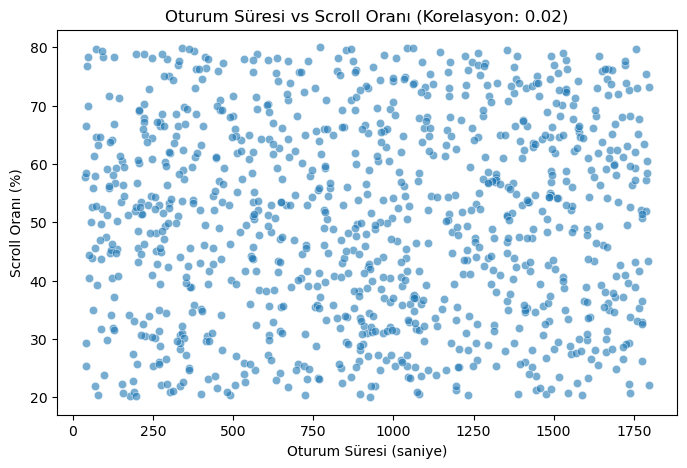

0.01719927232957766

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Korelasyon katsayısını hesaplama
correlation, p_value = stats.pearsonr(df["Session_Duration"], df["Scroll_Depth"])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Session_Duration"], y=df["Scroll_Depth"], alpha=0.6)
plt.xlabel("Oturum Süresi (saniye)")
plt.ylabel("Scroll Oranı (%)")
plt.title(f"Oturum Süresi vs Scroll Oranı (Korelasyon: {correlation:.2f})")
plt.show()

correlation


### Bu, oturum süresi ile scroll oranı arasında anlamlı bir ilişki olmadığını gösteriyor. Yani uzun süre sitede kalan kullanıcılar her zaman daha fazla kaydırma yapmıyor.

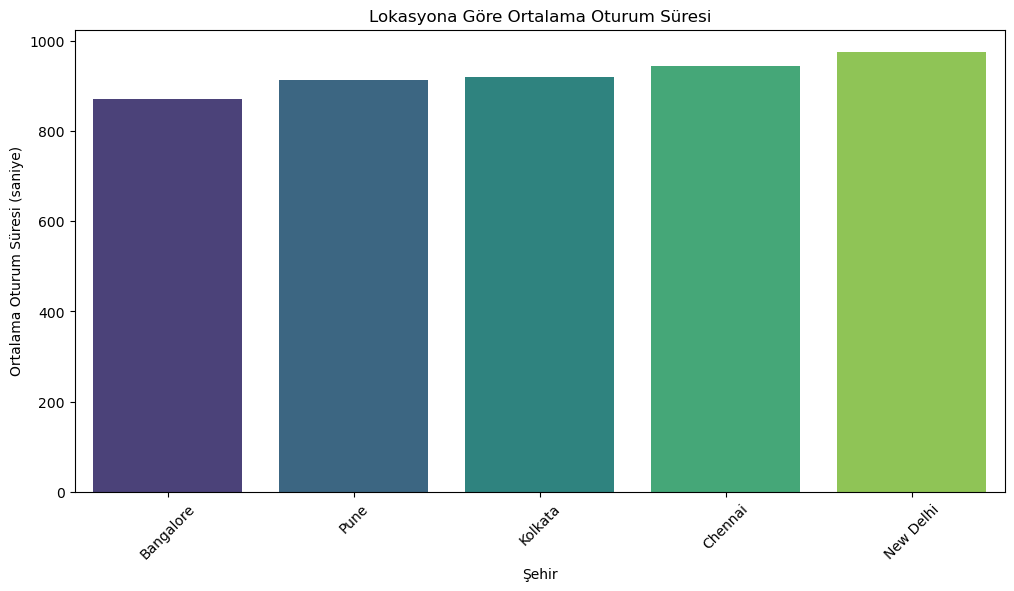

Location
Bangalore    871.257143
Pune         913.484375
Kolkata      921.164894
Chennai      944.504630
New Delhi    976.567010
Name: Session_Duration, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lokasyona göre oturum süresini gruplayarak ortalamaları hesaplama
location_session = df.groupby("Location")["Session_Duration"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=location_session.index, y=location_session.values, hue=location_session.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Şehir")
plt.ylabel("Ortalama Oturum Süresi (saniye)")
plt.title("Lokasyona Göre Ortalama Oturum Süresi")
plt.show()


location_session


### Bangalore: 871.26 saniye
### Pune: 913.48 saniye
### Kolkata: 921.16 saniye
### Chennai: 944.50 saniye
### New Delhi: 976.57 saniye
### Görselleştirme sonucunda New Delhi kullanıcılarının en uzun oturum süresine sahip olduğunu, Bangalore kullanıcılarının ise en kısa sürede oturumu sonlandırdığını görüyoruz

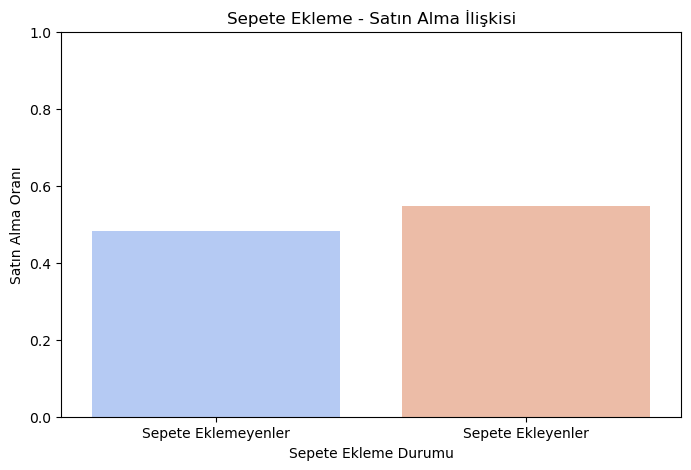

Added_to_Cart
0    0.483122
1    0.547529
Name: Purchases, dtype: float64

In [8]:
# "Added_to_Cart" ve "Purchases" sütunlarını sayısal hale getirme
df["Added_to_Cart"] = df["Added_to_Cart"].map({"Yes": 1, "No": 0})
df["Purchases"] = df["Purchases"].map({"Yes": 1, "No": 0})

# Sepete ekleyenlerin satın alma oranını hesaplama
purchase_rate = df.groupby("Added_to_Cart")["Purchases"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=purchase_rate.index, y=purchase_rate.values, hue=purchase_rate.index, palette="coolwarm", legend=False)
plt.xticks([0, 1], ["Sepete Eklemeyenler", "Sepete Ekleyenler"])
plt.xlabel("Sepete Ekleme Durumu")
plt.ylabel("Satın Alma Oranı")
plt.title("Sepete Ekleme - Satın Alma İlişkisi")
plt.ylim(0, 1)
plt.show()


purchase_rate


### Sepete eklemeyenlerin %48.3'ü yine de satın alma yapmış.
### Sepete ekleyenlerin %54.8'i satın alma işlemini tamamlamış.
### Sepete ekleme, satın alma ihtimalini artırıyor ama büyük bir fark yaratmıyor. Yani bazı kullanıcılar sepete eklemeden de doğrudan satın alım yapıyor olabilir.

# Yaş Gruplarına Göre Kullanıcı Davranışı

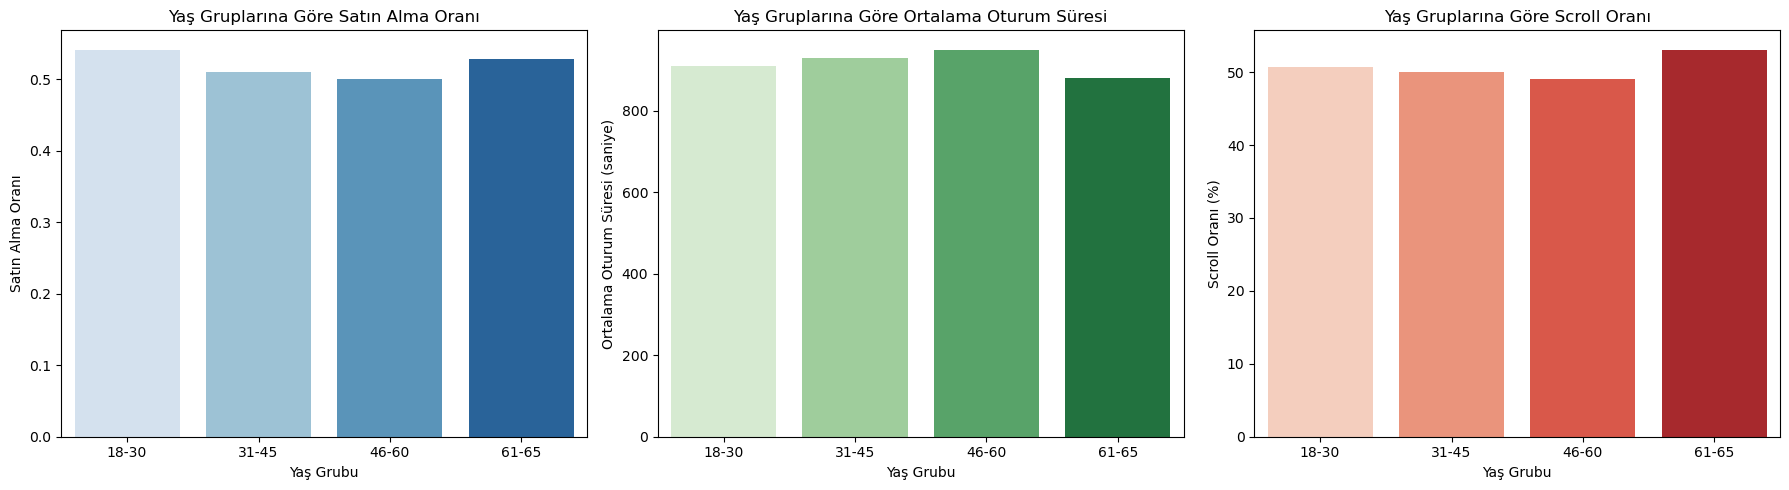

(Age_Group
 18-30    0.541353
 31-45    0.510714
 46-60    0.500000
 61-65    0.528302
 Name: Purchases, dtype: float64,
 Age_Group
 18-30    909.857143
 31-45    928.410714
 46-60    949.472393
 61-65    880.783019
 Name: Session_Duration, dtype: float64,
 Age_Group
 18-30    50.689096
 31-45    50.055394
 46-60    49.100398
 61-65    53.080409
 Name: Scroll_Depth, dtype: float64)

In [9]:
bins = [18, 30, 45, 60, 65]  # Yaş aralıkları
labels = ["18-30", "31-45", "46-60", "61-65"]  # Gruplar

# Yeni yaş grubu sütununu ekleyelim
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

# Yaş gruplarına göre ortalama satın alma oranları
age_purchase = df.groupby("Age_Group", observed=False)["Purchases"].mean()

# Yaş gruplarına göre ortalama oturum süresi 
age_session_duration = df.groupby("Age_Group", observed=False)["Session_Duration"].mean()

# Yaş gruplarına göre ortalama scroll oranı (observed=False ekledik)
age_scroll_depth = df.groupby("Age_Group", observed=False)["Scroll_Depth"].mean()

# Observed=False, gruplama işlemi sırasında kullanılmayan kategorik seviyelerin korunmasını sağlar. 
# Varsayılan olarak, pandas groupby() işlemi sırasında yalnızca veride gerçekten bulunan kategorileri döndürür (observed=True).
# Ancak, eğer kategorik sütunun tüm olası seviyelerinin kaybolmasını istemiyorsanız observed=False kullanabilirsiniz.

# Grafikleri çizelim
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Satın Alma Oranı Grafiği
sns.barplot(x=age_purchase.index, y=age_purchase.values, ax=axes[0], hue=age_purchase.index, palette="Blues", legend=False)
axes[0].set_title("Yaş Gruplarına Göre Satın Alma Oranı")
axes[0].set_xlabel("Yaş Grubu")
axes[0].set_ylabel("Satın Alma Oranı")

# Oturum Süresi Grafiği
sns.barplot(x=age_session_duration.index, y=age_session_duration.values, ax=axes[1], hue=age_session_duration.index, palette="Greens", legend=False)
axes[1].set_title("Yaş Gruplarına Göre Ortalama Oturum Süresi")
axes[1].set_xlabel("Yaş Grubu")
axes[1].set_ylabel("Ortalama Oturum Süresi (saniye)")

# Scroll Oranı Grafiği
sns.barplot(x=age_scroll_depth.index, y=age_scroll_depth.values, ax=axes[2], hue=age_scroll_depth.index, palette="Reds", legend=False)
axes[2].set_title("Yaş Gruplarına Göre Scroll Oranı")
axes[2].set_xlabel("Yaş Grubu")
axes[2].set_ylabel("Scroll Oranı (%)")

plt.tight_layout()
plt.show()

age_purchase, age_session_duration, age_scroll_depth


 Satın Alma Oranı (%):
18-30 yaş: %54.1 ile en yüksek satın alma oranına sahip.
61-65 yaş: %52.8 ile ikinci sırada.
31-45 ve 46-60 yaş grupları ise biraz daha düşük satın alma oranına sahip (~%50 civarı).

Oturum Süresi (saniye):
En uzun oturum süresi 46-60 yaş grubunda (949 saniye).
61-65 yaş grubu en kısa sürede çıkış yapıyor (880 saniye).
Gençler (yaklaşık 910 saniye) ile orta yaşlılar (yaklasşık 928 saniye) arasında büyük fark yok.

Scroll Oranı (%):
61-65 yaş grubu en yüksek scroll oranına sahip (%53.1).
Diğer yaş gruplarında bu oran 50 civarında.

Sonuç:
Gençler daha fazla satın alıyor ama oturum süresi ve kaydırma oranı yaşlı kullanıcılar için daha yüksek.
61-65 yaş grubu sayfayı en çok kaydıran grup.
En yüksek dönüşüm oranı 18-30 yaş grubunda.

## Tema Seçiminin Kullanıcı Davranışına Etkisi

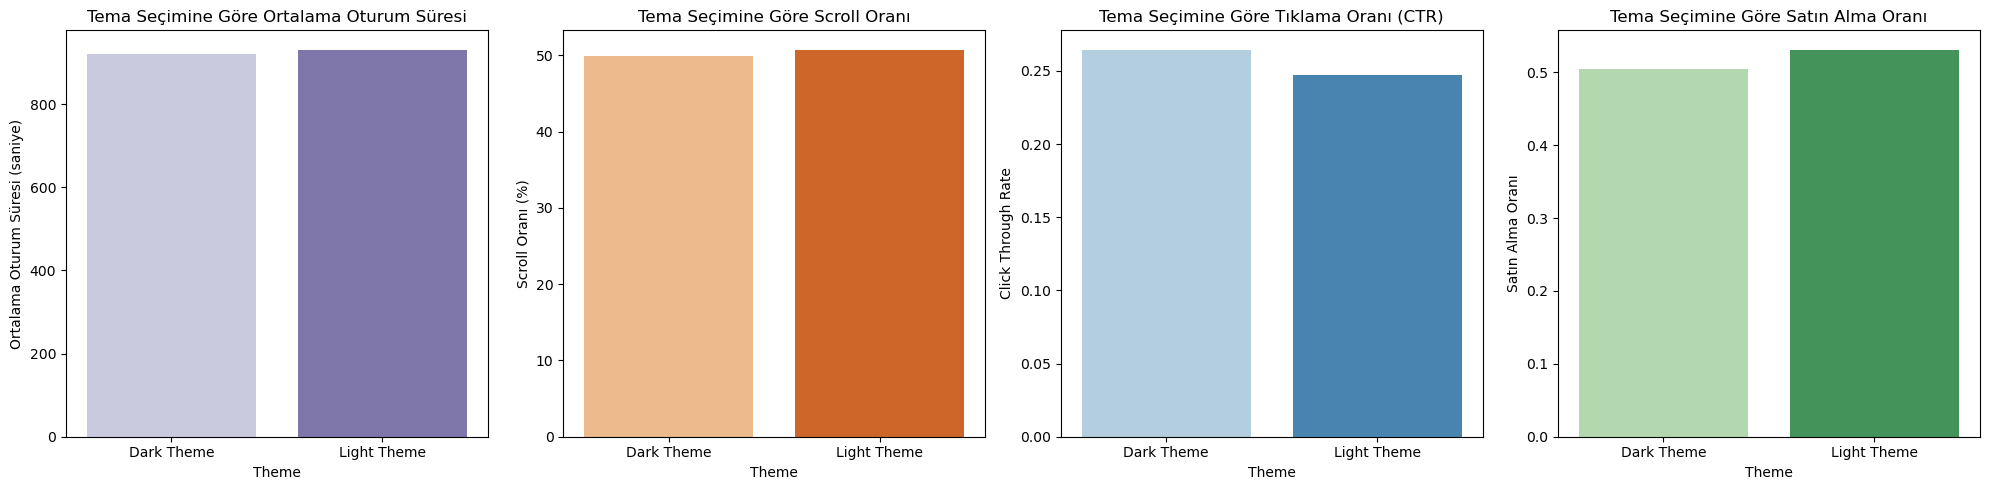

,Session_Duration,Scroll_Depth,Click_Through_Rate,Purchases
Theme,,,,
Dark Theme,919.482490,49.926404,0.264501,0.503891
Light Theme,930.833333,50.735232,0.247109,0.530864


In [10]:
theme_metrics = df.groupby("Theme").agg({
    "Session_Duration": "mean",
    "Scroll_Depth": "mean",
    "Click Through Rate": "mean",
    "Purchases": "mean"
}).rename(columns={"Click Through Rate": "Click_Through_Rate"})

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Tema bazında Oturum Süresi
sns.barplot(x=theme_metrics.index, y=theme_metrics["Session_Duration"], ax=axes[0], hue=theme_metrics.index, palette="Purples", legend=False)
axes[0].set_title("Tema Seçimine Göre Ortalama Oturum Süresi")
axes[0].set_ylabel("Ortalama Oturum Süresi (saniye)")

# Tema bazında Scroll Oranı
sns.barplot(x=theme_metrics.index, y=theme_metrics["Scroll_Depth"], ax=axes[1], hue=theme_metrics.index, palette="Oranges", legend=False)
axes[1].set_title("Tema Seçimine Göre Scroll Oranı")
axes[1].set_ylabel("Scroll Oranı (%)")

# Tema bazında Click Through Rate
sns.barplot(x=theme_metrics.index, y=theme_metrics["Click_Through_Rate"], ax=axes[2], hue=theme_metrics.index, palette="Blues", legend=False)
axes[2].set_title("Tema Seçimine Göre Tıklama Oranı (CTR)")
axes[2].set_ylabel("Click Through Rate")

# Tema bazında Satın Alma Oranı
sns.barplot(x=theme_metrics.index, y=theme_metrics["Purchases"], ax=axes[3], hue=theme_metrics.index, palette="Greens", legend=False)
axes[3].set_title("Tema Seçimine Göre Satın Alma Oranı")
axes[3].set_ylabel("Satın Alma Oranı")

plt.tight_layout()
plt.show()

theme_metrics


 Oturum Süresi (saniye):
Light Theme kullanıcıları (930.8 saniye) biraz daha uzun süre kalıyor.
Dark Theme kullanıcıları ise (919.5 saniye) biraz daha kısa oturum süresine sahip.

Scroll Oranı (%):
Light Theme kullananlar daha fazla kaydırma yapıyor (%50.7).
Dark Theme kullanıcıları ise biraz daha az kaydırıyor (%49.9).

Tıklama Oranı (CTR - Click Through Rate):
Dark Theme (0.264) daha yüksek tıklama oranına sahip!
Light Theme kullanıcıları daha az tıklama yapıyor (0.247).

Satın Alma Oranı (%):
Light Theme kullanıcıları %53.1 ile daha yüksek satın alma oranına sahip.
Dark Theme kullanıcıları %50.4 oranında satın alma yapıyor.

Sonuç:
Dark Theme daha fazla tıklama alıyor, ancak Light Theme kullanıcıları daha fazla satın alma yapıyor.
Light Theme kullanıcıları daha uzun oturum süresine sahip ve daha çok kaydırma yapıyor.
Dark Theme belki daha "görsel odaklı" kullanılıyor ve daha fazla tıklama çekiyor.

# Dönüşüm Hunisi (Conversion Funnel) Analizi
Dönüşüm hunisi şeması sebep ve sonuçlardan oluşmakta ve siteye gelen toplam ziyaretçinin davranışlarına bakarak kaçının eyleme geçtiğine dayanan bir şemadır.

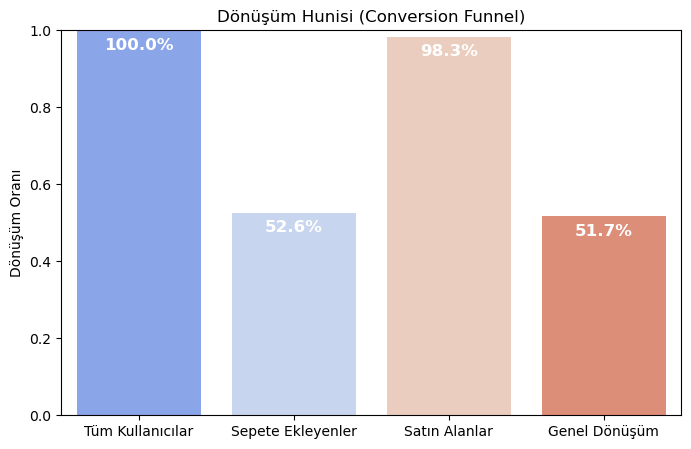

{'Click to Cart Rate': 0.526,
 'Cart to Purchase Rate': 0.9828897338403042,
 'Overall Conversion Rate': 0.517}

In [11]:
# Dönüşüm Hunisi (Conversion Funnel) Analizi

# Kullanıcıların her adımda dönüşüm oranlarını hesaplama
total_users = len(df)  # Toplam kullanıcı sayısı
click_to_cart = df[df["Added_to_Cart"] == 1].shape[0] / total_users  # CTR'dan sepete ekleme oranı
cart_to_purchase = df[df["Purchases"] == 1].shape[0] / df[df["Added_to_Cart"] == 1].shape[0]  # Sepetten satın alma oranı
overall_conversion = df[df["Purchases"] == 1].shape[0] / total_users  # Toplam dönüşüm oranı

# Dönüşüm hunisi
funnel_data = [1.0, click_to_cart, cart_to_purchase, overall_conversion]  # Normalize edilmiş oranlar
funnel_labels = ["Tüm Kullanıcılar", "Sepete Ekleyenler", "Satın Alanlar", "Genel Dönüşüm"]

plt.figure(figsize=(8, 5))
sns.barplot(x=funnel_labels, y=funnel_data, hue=funnel_labels, palette="coolwarm", legend=False)
plt.ylabel("Dönüşüm Oranı")
plt.title("Dönüşüm Hunisi (Conversion Funnel)")
plt.ylim(0, 1)

# Yüzdeleri ekleme
for i, v in enumerate(funnel_data):
    plt.text(i, v - 0.05, f"{v*100:.1f}%", ha='center', fontsize=12, fontweight='bold', color='white')

plt.show()




{
    "Click to Cart Rate": click_to_cart,
    "Cart to Purchase Rate": cart_to_purchase,
    "Overall Conversion Rate": overall_conversion
}


### Click Through Rate (CTR) → Sepete Ekleme Oranı: %52.6
### Tıklayan kullanıcıların %52.6’sı ürünü sepete ekliyor.

### Sepete Ekleme → Satın Alma Oranı: %98.3
### Sepete ekleyen kullanıcıların neredeyse tamamı satın alıyor

### Genel Dönüşüm Oranı: %51.7
### Siteye giren toplam kullanıcıların %51.7’si satın alma yapıyor.

### Sonuçlar:
### En büyük kayıp, kullanıcıların ürünü sepete ekleme aşamasında yaşanıyor.
### Sepete ekleyenlerin %98.3’ü satın alıyor